<h1 align=center style = "color:blue;"><font size = 7 face = "ravie">Tribute to "El Capitán Veneno"</font></h1>
<hr style = "border-bottom: 4px solid yellow; border-top: 4px solid yellow;">
<img src="archivos/JCA_WC_Final_mediana.png" style = "padding-top:10px;" width="800" height="600" align="center">
<hr style = "border: none; border-bottom: 4px solid yellow; border-top: 4px solid yellow;">

## Guillermo Huerta Montado
### December 2019

# Introduction<a id="0"></a>

The aim of this publication is to pay a posthumous tribute to **Juan Carlos Aragón**, "El Capitán Veneno": poet, philosopher and renowned author of chirigotas and comparsas of the Cádiz Carnival. To do this, we program a *web crawler* that obtains the lyrics of his most famous carnival groups and, from these, we create a WORD CLOUD that shows us which words appear the most among his repertoires.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px; clear:both;">
1. <a href="#0">Introduction</a><br>
2. <a href="#1">Exploring the data source</a><br>
3. <a href="#2">Knowing the packages</a><br>
4. <a href="#3">Getting the data</a><br>
5. <a href="#4">Creating the Word Cloud</a><br>
6. <a href="#5">Conclusions</a><br> 
</div>

# Exploring the data source<a id="1"></a>

In order to create the target word cloud of this post, we need to know the lyrics of the artist's works. To this end, we do an WWW search that leads us to find the blog [Letras desde el Paraiso](https://letrasdesdeelparaiso.blogspot.com/) (thank you very much to its creator, Jose Carlos Ortega Diez, for this fantastic repository!), where there is a wide range of lyrics from Cádiz Carnival groups, gathered by author, grouping, date, etc. We explore the website to know its structure and conclude that we can obtain the data by making a query by author. However, the lyrics of the different pieces ("presentaciones, pasodobles, cuplés y estribillos") are segregated in different temporary entries, in descending chronological order. Thus, in order to fetch them all we´ll need to generate linked queries that takes us through the whole dataset.

To be able to collect this data programmatically, we create a *web crawler* that will go through all these links, extract the letters and add them to a variable.

We may use this *web crawler* in the future to obtain data from other authors, years or groups in this website since the data is arranged according to the same structure.

# Knowing the packages<a id="2"></a>

Here we make a brief description of the Python packages that we use in this post:

* **requests** - Obtaining the *html* code from the web pages. 
* **beautifulsoup4** - *Html* code parsing and extraction of needed web elements.
* **wordcloud** - Word Cloud creation.
* **stop-words** - Spanish stopwords.
* **matplotlib** - Word Cloud visualization.
* **numpy** - *Array* creation.
* **PIL** - Image to *array* conversion (necessary for visualization mask).

If we do not have them installed in our Python environment, we can obtain them using this command:

In [1]:
# pip install -U requests beautifulsoup4 wordcloud stop-words matplotlib numpy PIL 

Then, load packages into our session:

In [2]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from stop_words import get_stop_words
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#To show the visualization directly in the notebook
%matplotlib inline 

# Getting the data<a id="3"></a>

The *web crawler* is created in the following code section.

Highlight here that we begin by providing the web address from which we start to collect data (the most recent blog post related to Juan Carlos Aragón) and creating an empty (text string) variable  where the "corpus" of text from which we will create the data cloud will be stored:

In [3]:
url = 'https://letrasdesdeelparaiso.blogspot.com/search/label/A%3A%20Juan%20Carlos%20Aragon' 
text_to_analyze = ''

# This loop adds the text for each of the blog entries to the "text_to_analyze" variable
# and go to the next blog post. If there are no more entries, it exits the loop
while True:
    r = requests.get(url)
    html_contents = r.text
    html_soup = BeautifulSoup(html_contents, 'html.parser')
    for found in html_soup.find_all('div', {'class':'MsoNoSpacing'}): #Elements that enclose lyrics
        text_to_analyze += found.text #Append text to the variable
    try:
        url = html_soup.find('a', {'class':'blog-pager-older-link'}).get('href') #Next post link
    except:
        break

In [4]:
len(text_to_analyze.replace("\n", " ").split())

108051

More than 100,000 words, not bad at all!

# Creating the Word Cloud<a id="4"></a>

Finally, through the code of this section, we create the WORD CLOUD that will show us what are the words that El Capitan Veneno used the most for his repertoires throughout his extensive career.

Herewith below some points about this section to be highlighted:
* Stopwords are a set of common words used on each language that can be ignored when trying to obtain the semantic content of a sentence.
* We add some words to the stopwords set which the author used with some frequency and that we understand do not add value for this publication's goal (i.e., "si", "tan", "va", etc.).
* Word cloud is casted using an image of author´s initials (JCA) that we have designed *ad hoc* for this post. 

In [5]:
# Variable containing stopwords for Spanish language
stop_words = set(get_stop_words('spanish'))

# We add some extra words
stop_words |= {"si", "tan", "va", "vez", "pa", "do", "va"}

len(stop_words)

314

More than 300 stopwords.

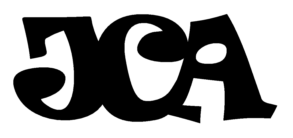

In [6]:
# We create the mask ("This is Carnival!!!"), with JCA initials, that will shape the word cloud.
jca_mask = np.array(Image.open('archivos/PlantillaJCA.png'))

# Plotting the mask (small size)
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(8.5) 

plt.imshow(jca_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Creating and plottig the word cloud:

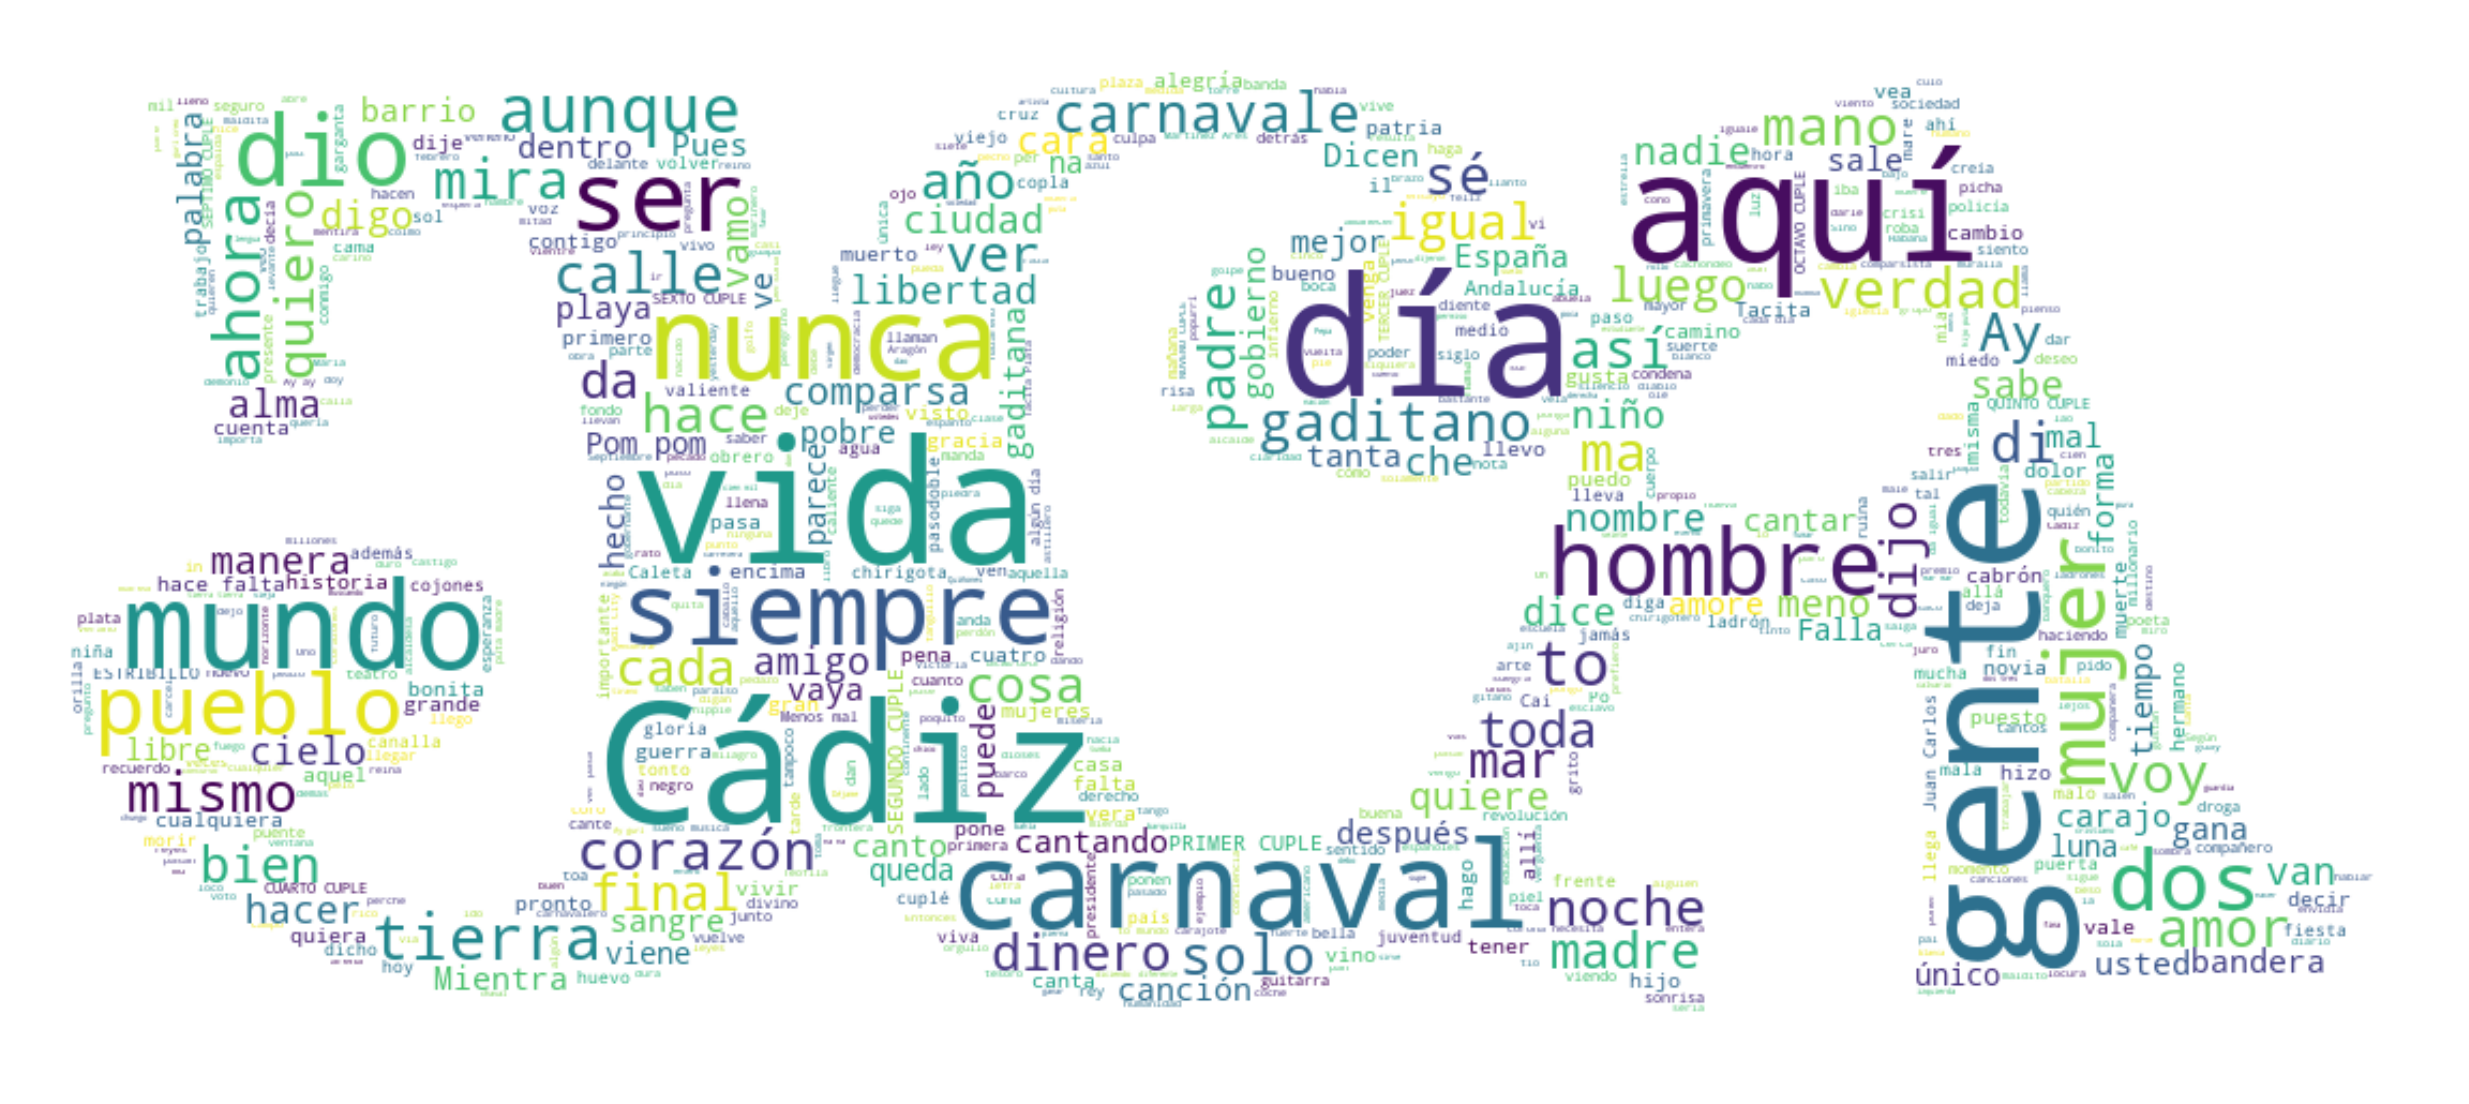

In [7]:
# Instantiate a word cloud object
jca_wc = WordCloud(background_color='white', max_words=2000, mask=jca_mask, stopwords=stop_words)

# Generate the word cloud
jca_wc.generate(text_to_analyze)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(44) # Modify depending on desired image size
fig.set_figheight(72) # Ídem

plt.imshow(jca_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusions<a id="5"></a>

As we can see in the previous visualization, the words that the author used most as a lyricist of carnival groups were:
* **CÁDIZ**
* **VIDA**
* **GENTE**
* **AQUÍ** (Will it have to do with "something to do" in Cádiz? - small humorous license :) -)
* **DÍA**

In addition, there are other words with a lower frequency of appearance but where I personally "find" a lot about the author.

To the Carnival of Cádiz fans, what do you think about being these ones the most used words by the sadly disappeared author? Have you been surprised? Leave your comments!

NOTE: code and mask can be found at this GitHub [repository](https://github.com/GuilleHM/Tribute_to_El_Capitan_Veneno).

<h1 align=center><font size = 7>RIP, Master.</font></h1>